In [1]:
%matplotlib inline

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndimage
import xarray as xr
import glob

import metpy.calc as mpcalc
from metpy.units import units

from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo

from IPython.display import display,clear_output
import os
from datetime import datetime

In [4]:
ds1 = xr.open_dataset(r"C:\Users\Reese\Desktop\AOS Proj Data\psap\enaaospsap3w1mC1.b1.20190303.000030.nc")
dsA = xr.concat([xr.open_dataset(f) for f in glob.glob(r"C:\Users\Reese\Desktop\AOS Proj Data\psap\*.nc")], dim='time')
dsA

<xarray.Dataset>
Dimensions:                 (bound: 2, time: 41760)
Coordinates:
  * time                    (time) datetime64[ns] 2019-03-03T00:00:30 ... 201...
Dimensions without coordinates: bound
Data variables: (12/30)
    base_time               (time) datetime64[ns] 2019-03-03 ... 2019-03-31
    time_offset             (time) datetime64[ns] 2019-03-03T00:00:30 ... 201...
    time_bounds             (time, bound) datetime64[ns] 2019-03-03 ... 2019-...
    sample_volume           (time) float32 1.125 1.125 1.125 ... 1.144 1.144
    qc_sample_volume        (time) int32 0 0 0 0 0 0 0 17 0 ... 0 0 0 0 0 0 0 0
    transmittance_blue      (time) float32 0.9187 0.9186 ... 0.9831 0.9829
    ...                      ...
    qc_sample_flow_rate     (time) int32 0 0 0 0 0 0 0 1 0 ... 0 0 0 0 0 0 0 0 0
    spot_size_area          (time) float32 17.5 17.5 17.5 ... 17.5 17.5 17.5
    impactor_state          (time) float64 10.0 10.0 10.0 ... 10.0 10.0 10.0
    lat                     (time) float32 39.09 39.09 39.09 ... 39.09 39.09
    lon                     (time) float32 -28.03 -28.03 ... -28.03 -28.03
    alt                     (time) float32 30.48 30.48 30.48 ... 30.48 30.48
Attributes: (12/19)
    command_line:             aospsap3w1m -s ena -f C1
    Conventions:              ARM-1.2
    process_version:          ingest-aospsap3w1m-1.1-0.el6
    dod_version:              aospsap3w1m-b1-1.1
    site_id:                  ena
    platform_id:              aospsap3w1m
    ...                       ...
    configuration_file:       enaaospsap3w1mC1.20131201.000000.config
    PSAP_Instrument:          Particle Soot Absorption Photometer
    Instrument_Manufacturer:  Radiance Research
    AOS_DAC_type:             D
    doi:                      10.5439/1225037
    history:                  created by user dsmgr on machine ruby at 2019-0...

Text(0, 0.5, 'Unitless')

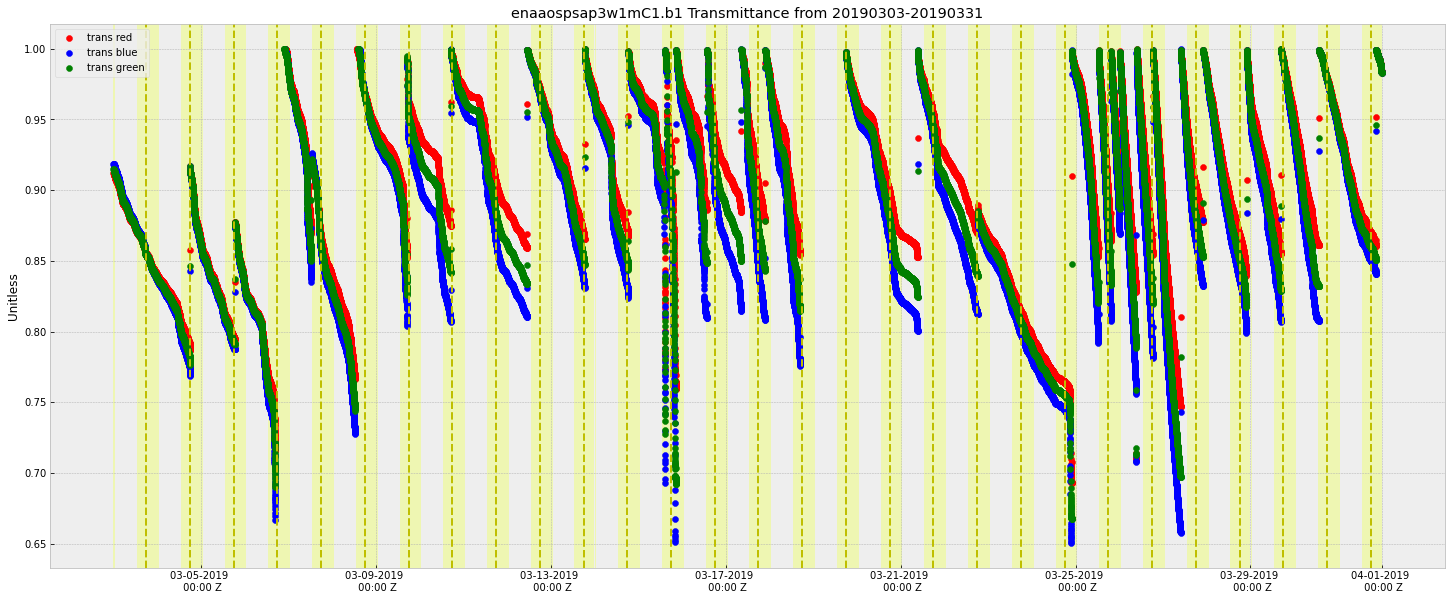

In [7]:
plt.style.use("bmh")
strt_day = 3
fig,ax = plt.subplots(1,1,figsize=(25,10))
ax.scatter(dsA['time'],dsA['transmittance_red'], color = 'red', label='trans red',zorder=2)
ax.scatter(dsA['time'],dsA['transmittance_blue'], color = 'blue', label='trans blue',zorder=2)
ax.scatter(dsA['time'],dsA['transmittance_green'], color = 'green', label='trans green',zorder=2)
ax.legend(loc='upper left')
# '{:0>2}'.format(3)
counter = strt_day
for i in range(29):
    plt.axvspan('2019-03-'+'{:0>2}'.format(counter)+'T00:00:30.000000000','2019-03-'+'{:0>2}'.format(counter)+'T00:59:30.000000000', facecolor='#efff77', alpha=0.5, zorder=0)
    plt.axvspan('2019-03-'+'{:0>2}'.format(counter)+'T12:59:30.000000000','2019-03-'+'{:0>2}'.format(counter)+'T23:59:30.000000000', facecolor='#efff77', alpha=0.5, zorder=0)
    plt.axvline('2019-03-'+'{:0>2}'.format(counter)+'T17:59:30.000000000', color='y', linestyle='--')
    counter += 1
ax.set_title("enaaospsap3w1mC1.b1 Transmittance from 20190303-20190331")
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%m-%d-%Y \n %H:%M Z'))
ax.set_ylabel('Unitless')

#Day starts at index 419 of time and ends 1139

Text(0, 0.5, '(L/min)')

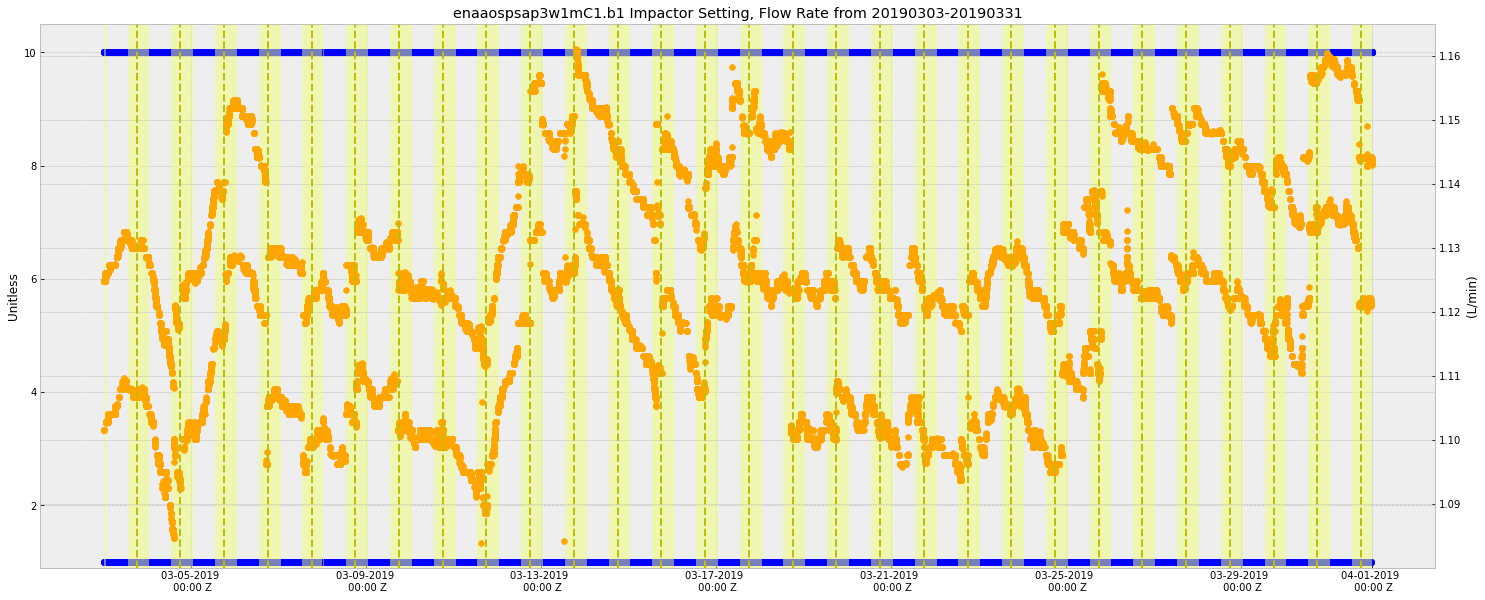

In [9]:
fig,ax1 = plt.subplots(1,1,figsize=(25,10))
ax2 = ax1.twinx()
ax1.scatter(dsA['time'],dsA['impactor_state'], color = 'blue', label='impactor',zorder=2)
ax2.scatter(dsA['time'],dsA['sample_flow_rate'], color = 'orange', label='sample_flow_rate',zorder=2)  
counter = strt_day
for i in range(29):
    plt.axvspan('2019-03-'+'{:0>2}'.format(counter)+'T00:00:30.000000000','2019-03-'+'{:0>2}'.format(counter)+'T00:59:30.000000000', facecolor='#efff77', alpha=0.5, zorder=0)
    plt.axvspan('2019-03-'+'{:0>2}'.format(counter)+'T12:59:30.000000000','2019-03-'+'{:0>2}'.format(counter)+'T23:59:30.000000000', facecolor='#efff77', alpha=0.5, zorder=0)
    plt.axvline('2019-03-'+'{:0>2}'.format(counter)+'T17:59:30.000000000', color='y', linestyle='--')
    counter += 1  
ax1.set_ylim(0.9,10.5)
ax1.set_title("enaaospsap3w1mC1.b1 Impactor Setting, Flow Rate from 20190303-20190331")
ax1.xaxis.set_major_formatter(mpl.dates.DateFormatter('%m-%d-%Y \n %H:%M Z'))
ax1.set_ylabel('Unitless', color='black')
ax2.set_ylabel('(L/min)', color='black')

I'm trying to see why we might be seeing two different sampe flow rate lines but it looks like its the oscilation line. These do seem like very high values when I comepare with the current Houston instrument.

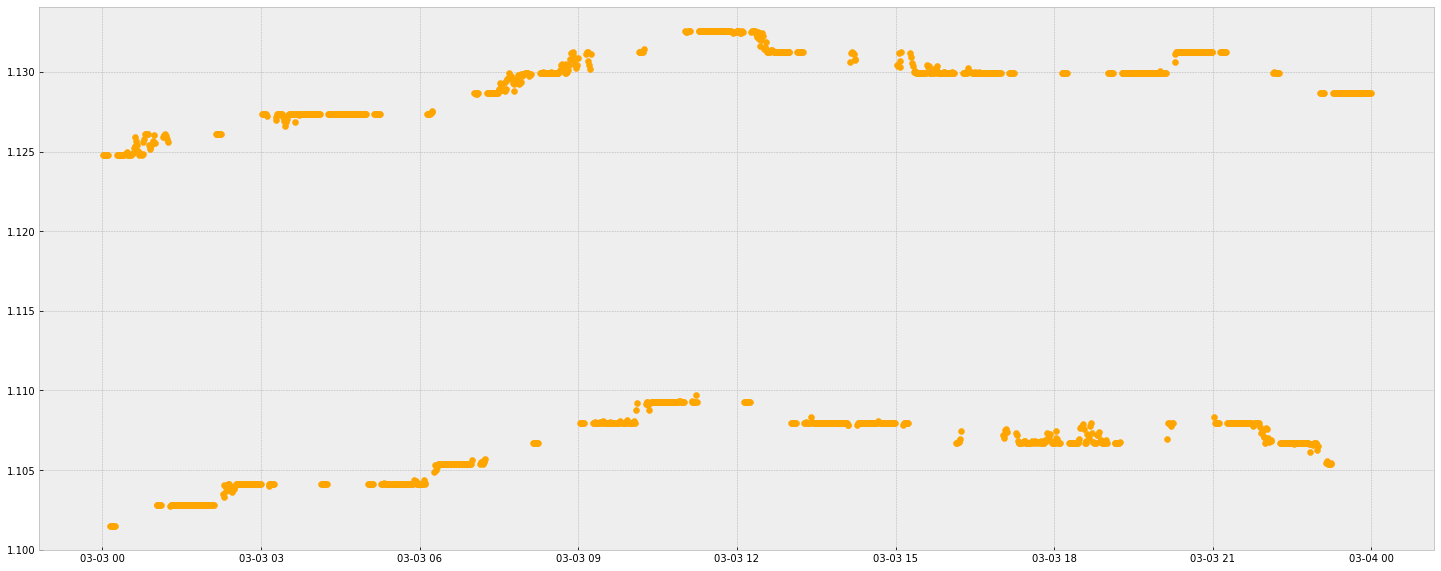

In [150]:
fig,ax1 = plt.subplots(1,1,figsize=(25,10))
ax1.scatter(ds1['time'],ds1['sample_flow_rate'], color = 'orange', label='sample_flow_rate',zorder=2) 

Okay, so it seems that we are seeing two lines are based on the impactor oscillation, so in the full mnth it just seems like two lines because of how closely spaced the data points have to be.

Adding an extra line to test that GitHub is picking up on changes!

In [10]:
dsA2 = xr.concat([xr.open_dataset(f) for f in glob.glob(r"C:\Users\Reese\Desktop\AOS Proj Data\aossmps\*.nc")], dim='time')
dsA2

<xarray.Dataset>
Dimensions:                                     (bound: 2, diameter_mobility: 192, time: 8902)
Coordinates:
  * time                                        (time) datetime64[ns] 2019-05...
  * diameter_mobility                           (diameter_mobility) float32 1...
Dimensions without coordinates: bound
Data variables: (12/50)
    base_time                                   (time) datetime64[ns] 2019-05...
    time_offset                                 (time) datetime64[ns] 2019-05...
    time_bounds                                 (time, bound) datetime64[ns] ...
    diameter_mobility_bounds                    (time, diameter_mobility, bound) float32 ...
    lower_size                                  (time) float32 11.1 ... 11.1
    dN_dlogDp                                   (time, diameter_mobility) float32 ...
    ...                                          ...
    DMA_inner_radius                            (time) float64 0.937 ... 0.937
    DMA_outer_radius                            (time) float64 1.961 ... 1.961
    DMA_characteristic_length                   (time) float64 44.37 ... 44.37
    lat                                         (time) float32 36.6 ... 36.6
    lon                                         (time) float32 -97.49 ... -97.49
    alt                                         (time) float32 318.0 ... 318.0
Attributes: (12/29)
    command_line:                 aossmpscorr -s sgp -f E13
    Conventions:                  ARM-1.2
    process_version:              ingest-aossmpscorr-1.1-0.el7
    dod_version:                  aossmps-b1-2.1
    site_id:                      sgp
    platform_id:                  aossmps
    ...                           ...
    classifier_serial_number:     3082001529004
    channels_per_decade:          64
    instrument_output_units:      dw/dlogDp
    instrument_output_weighting:  Number
    doi:                          10.5439/1476898
    history:                      created by user dsmgr on machine zinc at 20...

Text(0, 0.5, 'nm$^{2}$cm$^{3}$')

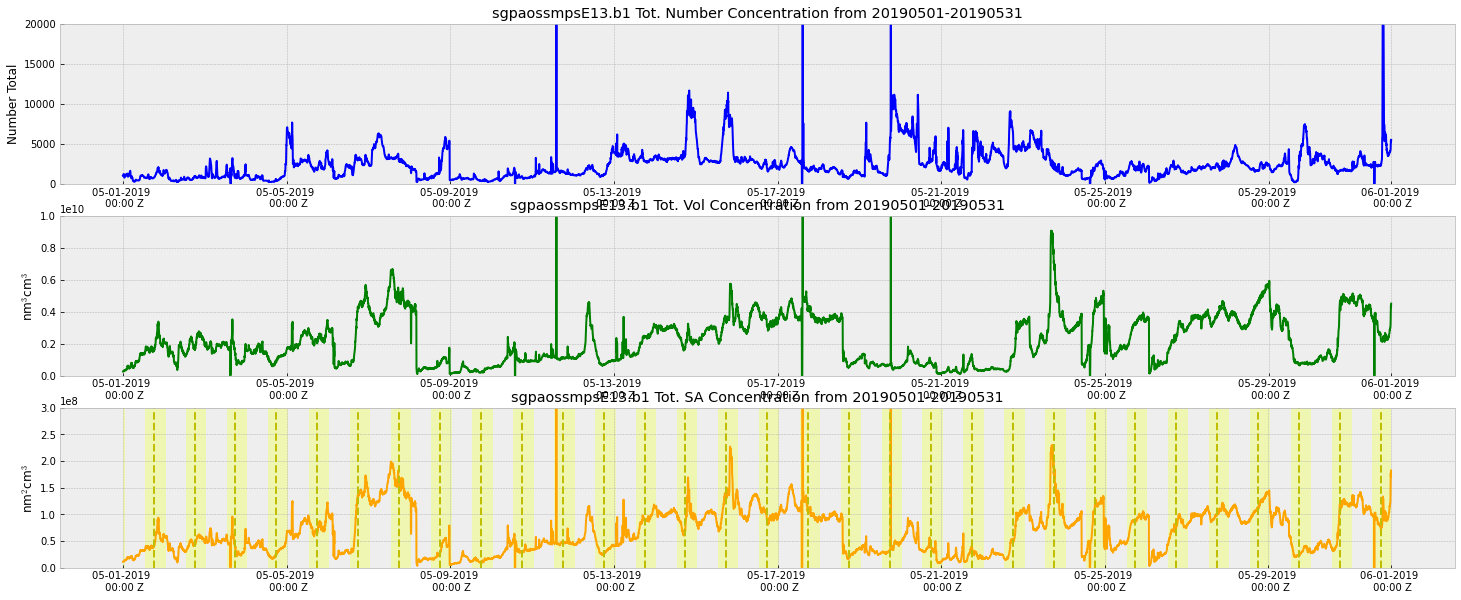

In [55]:
#dsA2['total_N_conc'].plot()
#Number concentration
fig, (ax,ax1,ax2) = plt.subplots(3,1,figsize=(25,10))
counter = 1
ax.plot(dsA2['time'],dsA2['total_N_conc'], color = 'blue', label='total_N_conc',zorder=2)

ax.set_ylim([-5,20000])
ax.set_title("sgpaossmpsE13.b1 Tot. Number Concentration from 20190501-20190531")
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%m-%d-%Y \n %H:%M Z'))
ax.set_ylabel('Number Total')
#Volume concentration
counter = 1
ax1.plot(dsA2['time'],dsA2['total_V_conc'], color = 'green', label='total_V_conc',zorder=2)

ax1.set_ylim([-5,1.0e10])
ax1.set_title("sgpaossmpsE13.b1 Tot. Vol Concentration from 20190501-20190531")
ax1.xaxis.set_major_formatter(mpl.dates.DateFormatter('%m-%d-%Y \n %H:%M Z'))
ax1.set_ylabel('nm$^{3}$cm$^{3}$')
#SA concentration
counter = 1
ax2.plot(dsA2['time'],dsA2['total_SA_conc'], color = 'orange', label='total_SA_conc',zorder=2)
for i in range(31):
    plt.axvspan('2019-05-'+'{:0>2}'.format(counter)+'T00:00:30.000000000','2019-05-'+'{:0>2}'.format(counter)+'T00:59:30.000000000', facecolor='#efff77', alpha=0.5, zorder=0)
    plt.axvspan('2019-05-'+'{:0>2}'.format(counter)+'T12:59:30.000000000','2019-05-'+'{:0>2}'.format(counter)+'T23:59:30.000000000', facecolor='#efff77', alpha=0.5, zorder=0)
    plt.axvline('2019-05-'+'{:0>2}'.format(counter)+'T17:59:30.000000000', color='y', linestyle='--')
    counter += 1
ax2.set_ylim([-5,3.0e8])
ax2.set_title("sgpaossmpsE13.b1 Tot. SA Concentration from 20190501-20190531")
ax2.xaxis.set_major_formatter(mpl.dates.DateFormatter('%m-%d-%Y \n %H:%M Z'))
ax2.set_ylabel('nm$^{2}$cm$^{3}$')

Working out how to plot the colorscal contour in logarithmic fashion

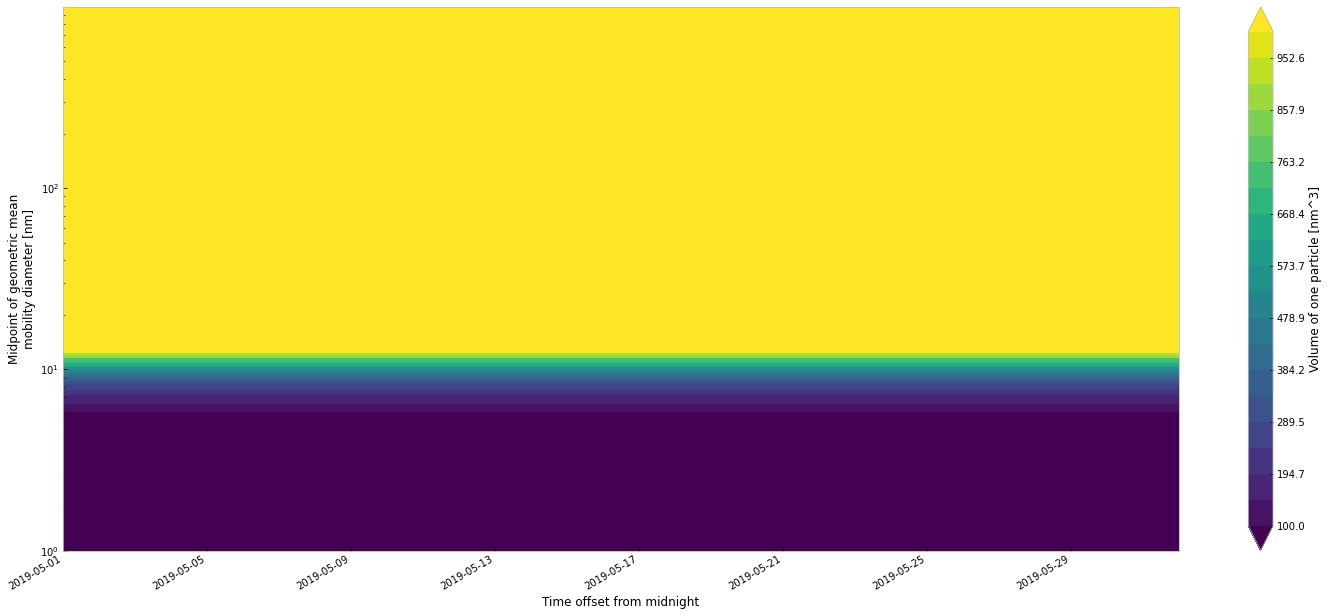

In [128]:
import matplotlib.colors as colors

lvls=np.linspace(100, 1000, 20)
xr.plot.pcolormesh(dsA2['dD_to_dV'], 'time', 'diameter_mobility', figsize=(25,10), yincrease =True, yscale='log', levels=lvls)


# Well this is clearly wrong....


The Mode on the following is a bit out of contol 

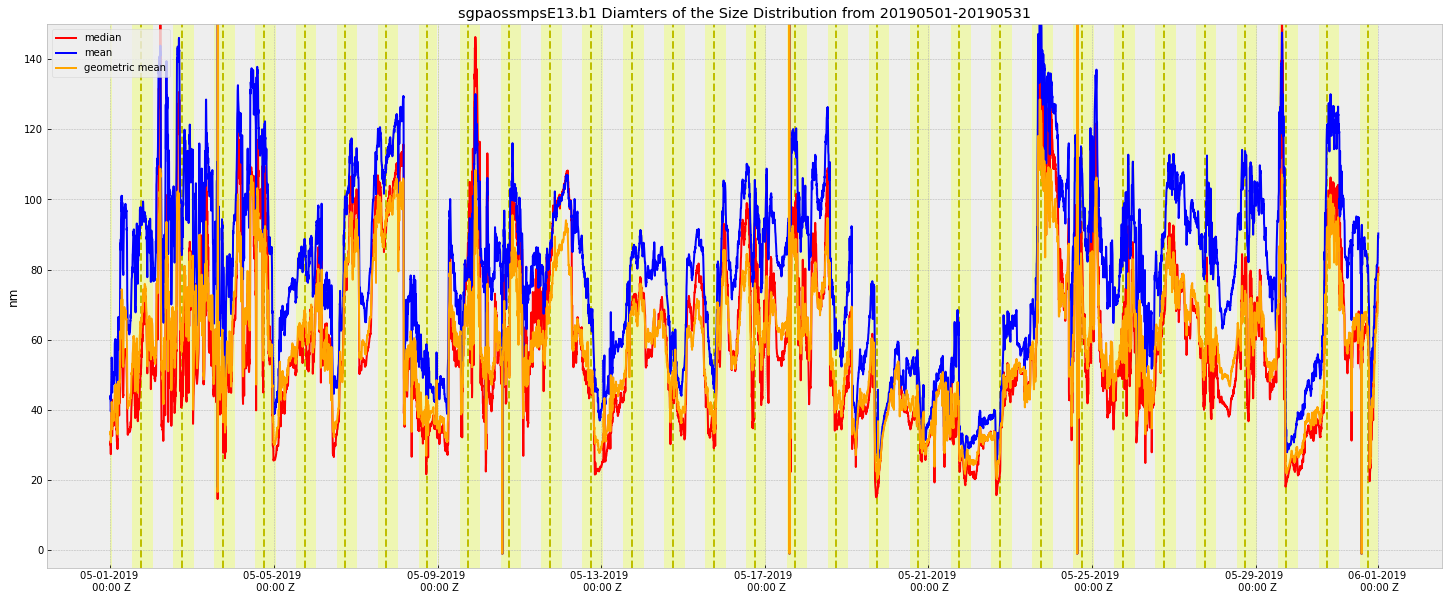

In [124]:
fig,ax = plt.subplots(1,1,figsize=(25,10))
ax.plot(dsA2['time'],dsA2['median'], color = 'red', label='median',zorder=2)
ax.plot(dsA2['time'],dsA2['mean'], color = 'blue', label='mean',zorder=2)
#ax.plot(dsA2['time'],dsA2['mode'], color = 'green', label='mode',zorder=2)
ax.plot(dsA2['time'],dsA2['geometric_mean'], color = 'orange', label='geometric mean',zorder=2)
counter = 1
for i in range(31):
    plt.axvspan('2019-05-'+'{:0>2}'.format(counter)+'T00:00:30.000000000','2019-05-'+'{:0>2}'.format(counter)+'T00:59:30.000000000', facecolor='#efff77', alpha=0.5, zorder=0)
    plt.axvspan('2019-05-'+'{:0>2}'.format(counter)+'T12:59:30.000000000','2019-05-'+'{:0>2}'.format(counter)+'T23:59:30.000000000', facecolor='#efff77', alpha=0.5, zorder=0)
    plt.axvline('2019-05-'+'{:0>2}'.format(counter)+'T17:59:30.000000000', color='y', linestyle='--', zorder=0)
    counter += 1
ax.set_ylim(-5,150)
ax.set_title("sgpaossmpsE13.b1 Diamters of the Size Distribution from 20190501-20190531")
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%m-%d-%Y \n %H:%M Z'))
ax.set_ylabel('nm')
ax.legend(loc='upper left')